# Documentation for the loop code

This notebook document the structure of the loop.py that makes the chi square calculation between the synthetic Stokes V profiles and a pyRaven observation packet, for a grid of magnetic dipole parameter values. 

## 0. Importing the necessary packages

In [1]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt

import pyRaven as rav

loading specpolFlow package


## Code structure

Insert text here

## Test of the code (and later on, a demo)

Importing a test pyRaven data packet that contains $n$ LSD profiles that have been scaled, normalized, and cut to include only the portion of the line profile that will be used for the calculation of the chi square

In [2]:
Packet = rav.data.read_packet('Packet_test.h5')

We are here generating the data structures that contains information for the codes:
* genparam: general parameters, same as for diskint2 function. However the Bpole, incl, beta, and phase parameters are not necessary here, as they will be set by the gridparam structure. This said, one can still pass a genparam structure that was used for diskint2 -- the extra parameters are simply ignored. 
* weakparam: the lande factor for the weak field approximation
* unnoparam: here, the unno parameter are not necessary for the loop per-say, but they are set to a triplet with geff of 1.0, in case comparison with the diskint2 with the unno solution are made. 
* gridparam: contains the arrays defining the grid for the dipolar parameters. 

At the end, we define a Zeeman pattern object, just in case a comparison with the unno solution is made. 

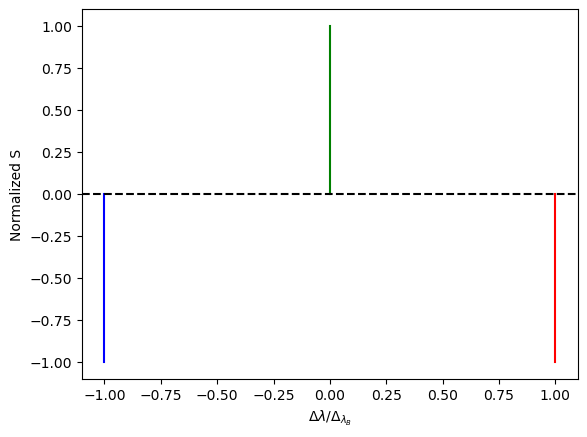

In [3]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':50.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(10)       # the number of sample point per doppler width for the wavelength array
    'Bpole':1000, #not necessary for loop
    'incl':30*np.pi/180, #not necessary for loop
    'beta':30*np.pi/180, #not necessary for loop
    'phase':90*np.pi/180 #not necessary for loop
  }

unnoparam = {
    'down':[0, 0, 0],   # the s, j, l of the lower level
    'up':[0, 1, 1],    # the s, j, l of the upper level
    }

weakparam = {
        'geff':1.0
    }

gridparam = {
        'Bgrid': np.array([1000, 2000]),
        'igrid': np.array([30,60]),
        'betagrid':np.array([30]),
        'phasegrid':np.array([90])
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno': unnoparam # no necessary for loop
       }

pat = rav.pattern.zeeman_pattern(unnoparam['down'], unnoparam['up'])
rav.pattern.plot_zeeman_pattern(pat)

Using 3000.0 grid point on the surface
Evaluating with weak approximation...
Max velocity needed: 15.0 vdop
Number of wavelength/velocity grid points: 321


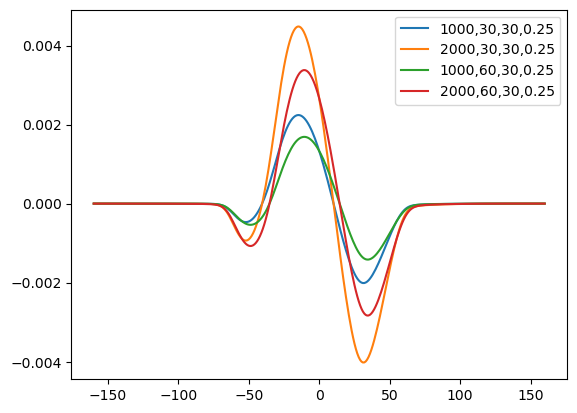

In [4]:
fig, ax = plt.subplots(1,1)

rav.loop.loop(param, Packet, ax)

ax.legend(loc=0)

#model, ROT, LOS, MAG = rav.diskint.numerical(param, False)
#ax.plot(model['vel'], model['V'], ls='--', c='k')
#model, ROT, LOS, MAG = rav.diskint.numerical(param, True)
#ax.plot(model['vel'], model['V'], ls='dotted', c='k')


In [8]:
model = rav.diskint.numerical(param, False)

Max velocity needed: 20.0 vdop


In [9]:
model

(array([(4996.497577  , -210. , -21.  , 0.4999558 , 0., 0., 0.,  1.21849566e-08),
        (4996.49924482, -209.9, -20.99, 0.4999558 , 0., 0., 0.,  1.21736952e-08),
        (4996.50091264, -209.8, -20.98, 0.49995579, 0., 0., 0.,  1.21628716e-08),
        ...,
        (5003.49908736,  209.8,  20.98, 0.49995579, 0., 0., 0., -9.46057627e-09),
        (5003.50075518,  209.9,  20.99, 0.4999558 , 0., 0., 0., -9.46666503e-09),
        (5003.502423  ,  210. ,  21.  , 0.4999558 , 0., 0., 0., -9.47319155e-09)],
       dtype=[('wave', '<f8'), ('vel', '<f8'), ('vdop', '<f8'), ('flux', '<f8'), ('fluxnorm', '<f8'), ('Q', '<f8'), ('U', '<f8'), ('V', '<f8')]),
 array([[ 1.96299079e-02, -3.92598158e-02,  1.96299079e-02, ...,
          1.96299079e-02, -3.92598158e-02,  1.96299079e-02],
        [ 3.39999978e-02,  4.80794077e-18, -3.39999978e-02, ...,
          3.39999978e-02,  4.80794077e-18, -3.39999978e-02],
        [ 9.99229036e-01,  9.99229036e-01,  9.99229036e-01, ...,
         -9.99229036e-01, -9.99